#### Importing basic libraries to deal with the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read dataset

In [2]:
dataset = pd.read_csv('cars_data.csv')

#### Discovering dataset features, their data types & number of non null values and dimensions of dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#### Columnwise data analysis

In [4]:
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#### Displaying names of columns in dataset

In [5]:
dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

#### Finding number of duplicate values

In [6]:
print('Number of duplicates are : ', dataset.duplicated().sum())
dataset.shape

Number of duplicates are :  715


(11914, 16)

#### Dropping duplicate values

In [7]:
dataset = dataset.drop_duplicates()
print('After removing duplicates, number of duplicates: ', dataset.duplicated().sum())
dataset.shape

After removing duplicates, number of duplicates:  0


(11199, 16)

#### Checking for redundant data

In [8]:
#Open full output data in text editor
lt = dataset.columns
for i in lt:
    print(i,":\n",dataset[i].unique(),"\n")

Make :
 ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti'] 

Model :
 ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglie

#### Detecting and Handling Outliers by creating a box plot

In [9]:
import plotly.express as px #To determine IQR and find outliers using a box plot
def detect_outliers(data, value):
    fig = px.box(data, value)
    fig.show()
detect_outliers(dataset, dataset['MSRP'])

#### Outliers need to replaced appropriately

#### Replacing outliers

In [10]:
dt_copy = dataset.copy() #copy of dataset
print("Shape before removing outliers: ",dataset.shape)

def remove_outliers(data, column):#function to calculate IQR and to remove outliers from the dataset
    # to get the IQR(Inter Quartile Range)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # get the upper and lower limit
    iqr = Q3 - Q1

    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    # cap number below Q1 and above Q3 as outliers
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                   np.where(data[column] < lower_limit, lower_limit, data[column]))
    return  data

#Cleaned dataset
cleaned_car_data = remove_outliers(dt_copy, 'MSRP')
print("Shape after removing outliers: ",cleaned_car_data.shape)

Shape before removing outliers:  (11199, 16)
Shape after removing outliers:  (11199, 16)


#### ^Confirmation that rows with the outliers haven't been deleted

### Comparing dataset before and after replacing outliers

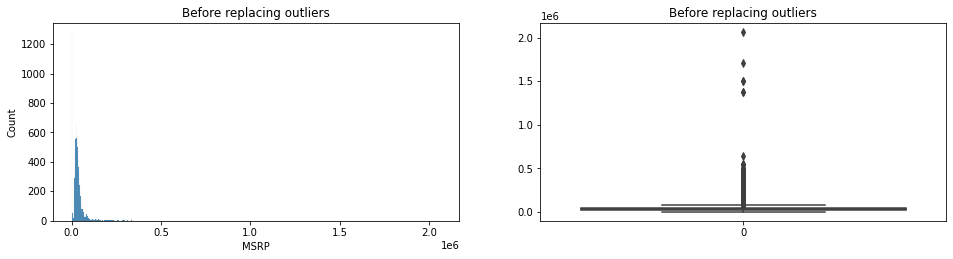

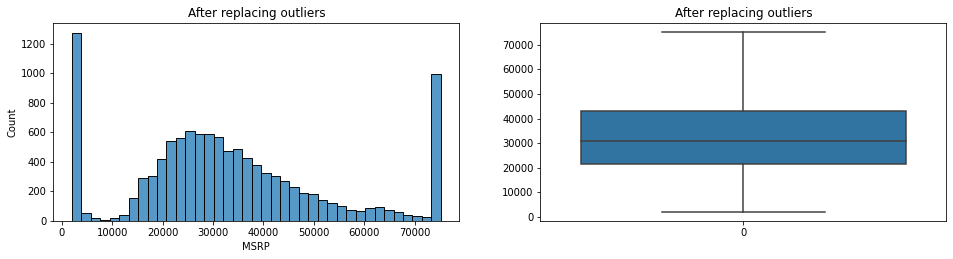

In [11]:
import seaborn as sb

#Histogram
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title('Before replacing outliers')
sb.histplot(dataset['MSRP'])

#Boxplot
plt.subplot(2,2,2)
sb.boxplot(dataset['MSRP'])
plt.title('Before replacing outliers')
plt.show()

#Histogram
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
plt.title('After replacing outliers')
sb.histplot(cleaned_car_data['MSRP'])

#Boxplot
plt.subplot(2,2,4)
sb.boxplot(cleaned_car_data['MSRP'])
plt.title('After replacing outliers')
plt.show()

#### Splitting dataset into set of independent variables and set of dependent variables

In [12]:
X = cleaned_car_data.iloc[:,:-1].values #Independent variables
y = cleaned_car_data.iloc[:,-1].values #Dependent variable(MSRP)

#### Taking care of missing values in dataset

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(X[:,0:])
X[:,0:] = imputer.transform(X[:,0:])
#To replace 'Transmission' values = 'UNKNOWN'(found out using 'unique' function above)
imputer = SimpleImputer(missing_values='UKNOWN', strategy='most_frequent')
imputer.fit(X[:,[6]])
X[:,[6]] = imputer.transform(X[:,[6]])

In [14]:
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Encoding all categorical features to numeric values

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder',OrdinalEncoder(encoded_missing_value=-1),
[0,1,3,6,7,8,9,10,11])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0])

[4.0 1.0 8.0 3.0 3.0 0.0 38.0 0.0 8.0 2011 335.0 6.0 26 19 3916]


##### Encoding will shuffle all the columns i.e the order of the columns won't be the same as in dataset, all encoded values will be shifted to the left

In [16]:
#Scaling to smaller values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,0:] = sc.fit_transform(X[:,0:])
print(X[0])

[-1.3119569392803285 -1.693869250160844 0.01876595395717283
 1.732665771724385 1.149733936180923 -1.6664466914795872
 0.33563270705056925 -1.1191415063564727 -0.07585878587365144
 0.0394958931874387 0.74568542006128 0.18841862482373536
 -0.06801536273712086 -0.07974713577472532 1.6308173758635829]


#### Summarizing weightage of each feature in X to predict MSRP

Feature: 0, Score: -801.55593
Feature: 1, Score: -283.51129
Feature: 2, Score: -882.57020
Feature: 3, Score: -1189.46061
Feature: 4, Score: -1386.07463
Feature: 5, Score: -163.80122
Feature: 6, Score: 1235.53181
Feature: 7, Score: -481.30109
Feature: 8, Score: -571.65429
Feature: 9, Score: 5653.98198
Feature: 10, Score: 13952.53185
Feature: 11, Score: -135.47611
Feature: 12, Score: 537.70884
Feature: 13, Score: 583.63896
Feature: 14, Score: -1053.45533


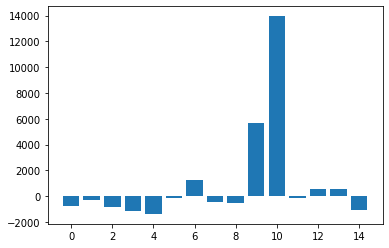

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fitting model
model.fit(X, y)
#getting importance of features
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### This output indicates that features 6, 9,10, 12, 13 are the most viable features for prediction
#### i.e Features-'Market Category','Year', 'Engine HP', 'Highway MPG' and 'City MPG' respectively

In [18]:
X = X[:,[6,9,10,12,13]] 
print(X[0])

[0.33563270705056925 0.0394958931874387 0.74568542006128
 -0.06801536273712086 -0.07974713577472532]


#### Splitting into training sets and test sets

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Fitting training data into linear regression model

In [20]:
#Fitting training sets into model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

#### Linear Regression Model Testing

In [21]:
# Predicting outcome/msrp from independent variable test(x_test) set and comparing predicted values 
# with actual dependent test set(y_test)
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
dict = {'Predicted':y_pred,'Actual':y_test}
print(pd.DataFrame(dict))
print(f"\nLinear Regression Accuracy= {r2_score(y_test,y_pred):.3f}")

         Predicted   Actual
0     39023.356923  42600.0
1     24874.943599  21795.0
2      5311.877618   2350.0
3     77291.030784  75182.0
4     27541.162991  28200.0
...            ...      ...
2235  31552.695116  33540.0
2236  16869.480835  16580.0
2237  42807.965767  38215.0
2238  28713.950508  25995.0
2239  18842.401565  22305.0

[2240 rows x 2 columns]

Linear Regression Accuracy= 0.766


#### Plotting scatter plot for linear regression model to check correlation

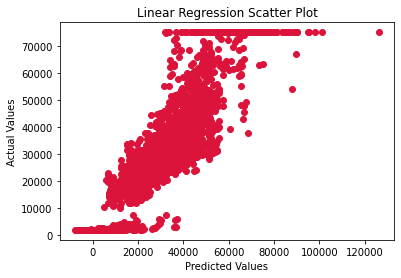

In [22]:
#Graphical representation
plt.scatter(y_pred,y_test, c='crimson')
plt.title('Linear Regression Scatter Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Comparing r2 scores of different regressors to choose best one

In [23]:
# training models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear regression": LinearRegression(),
    "Linear regression (Ridge)": Ridge(),
    "Linear regression (Lasso)": Lasso(),
    "Random forest": RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor()
}

#Fitting training data into models and checking each model's accuracy
for item, model in models.items():
    model.fit(X_train, y_train)
for name, model in models.items():
     print(name + ' ' + 'Rˆ2 Score: {:.3f}'.format(model.score(X_test, y_test)))

Linear regression Rˆ2 Score: 0.766
Linear regression (Ridge) Rˆ2 Score: 0.766
Linear regression (Lasso) Rˆ2 Score: 0.766
Random forest Rˆ2 Score: 0.957
Gradient boosting Rˆ2 Score: 0.913


#### Going with random forest for predictions based on this result

#### Creating and training random forest model

In [24]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

#### Testing random forest model

In [25]:
rf_y_pred = rf_regressor.predict(X_test)
dict = {'Predicted':rf_y_pred,'Actual':y_test}
print(pd.DataFrame(dict))
print(f"\nRandom Forest Accuracy= {r2_score(rf_y_pred,y_test):.3f}")

         Predicted   Actual
0     44131.816667  42600.0
1     21821.850000  21795.0
2      2782.294762   2350.0
3     75182.000000  75182.0
4     30935.202103  28200.0
...            ...      ...
2235  29249.272500  33540.0
2236  15518.841667  16580.0
2237  35496.948375  38215.0
2238  27593.001587  25995.0
2239  21727.647500  22305.0

[2240 rows x 2 columns]

Random Forest Accuracy= 0.955


#### Plotting a random forest scatter plot to show correlation

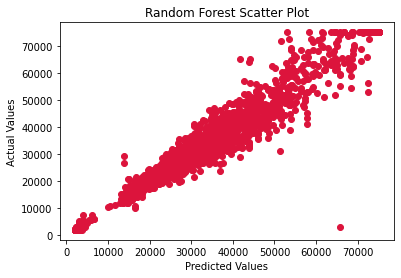

In [26]:
#Graphical representation
plt.scatter(rf_y_pred,y_test, c='crimson')
plt.title('Random Forest Scatter Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()